<a href="https://colab.research.google.com/github/Vismayamohan17/data-science-assignment/blob/main/Preprocessing%20on%20Loan%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd

In [39]:
df=pd.read_csv('/content/train_loan_preprocess (1).csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [42]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [49]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')


In [62]:
null_columns = df[['LoanAmount','Loan_Amount_Term','Credit_History']]

In [63]:
imputer = imputer.fit(null_columns)
null_columns = imputer.transform(null_columns)
null_columns = imputer.fit_transform(null_columns)

In [64]:
null_columns = pd.DataFrame(null_columns, columns=['LoanAmount','Loan_Amount_Term','Credit_History'])

In [65]:
null_columns.isna().sum()

,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [74]:
null_columns1 = df[['Gender','Married','Dependents','Self_Employed']]

In [75]:
imputer = imputer.fit(null_columns1)
null_columns1 = imputer.transform(null_columns1)
null_columns1 = imputer.fit_transform(null_columns1)

In [79]:
null_columns1 = pd.DataFrame(null_columns1, columns=['Gender','Married','Dependents','Self_Employed'])


In [80]:
null_columns1.isna().sum()

,0
Gender,614
Married,614
Dependents,614
Self_Employed,614


In [59]:
categorical_columns=df[['Gender','Married','Dependents','Self_Employed']]
categorical_columns.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

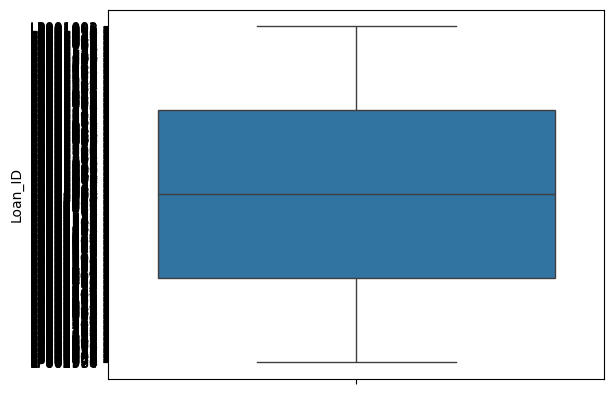

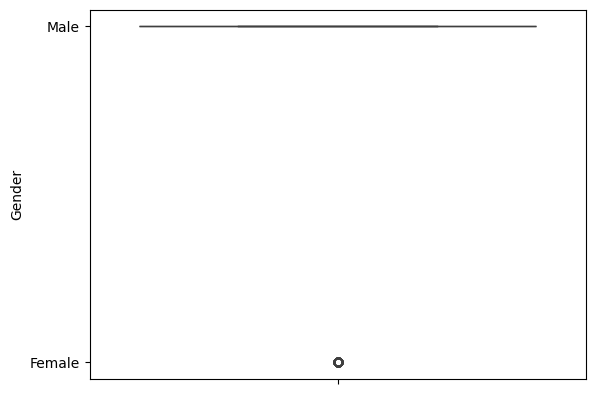

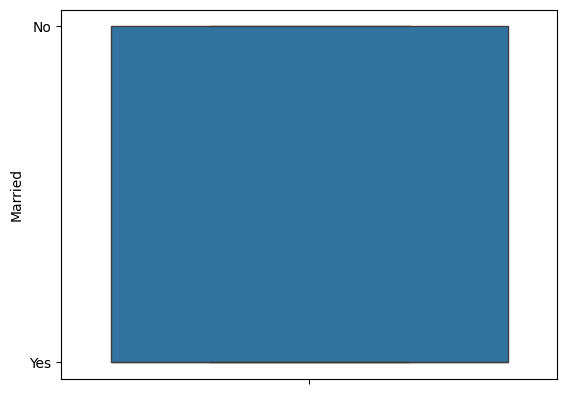

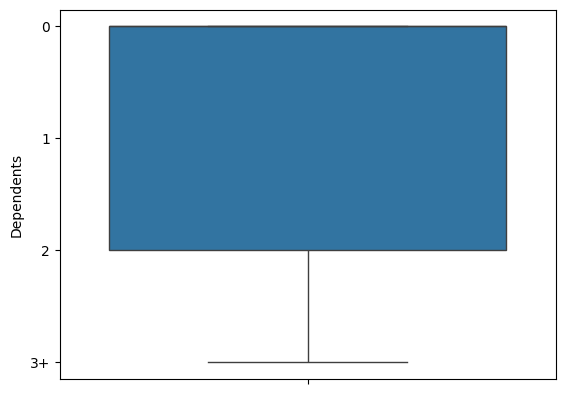

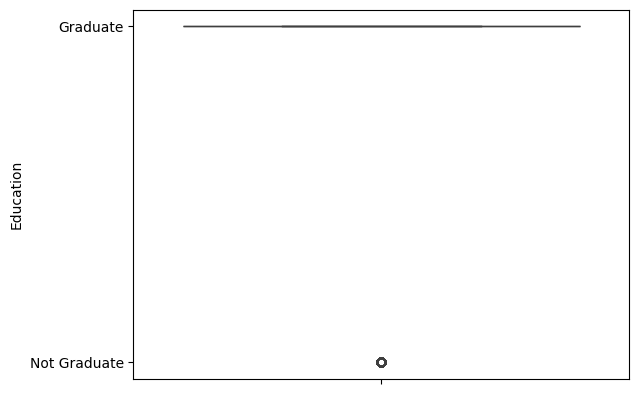

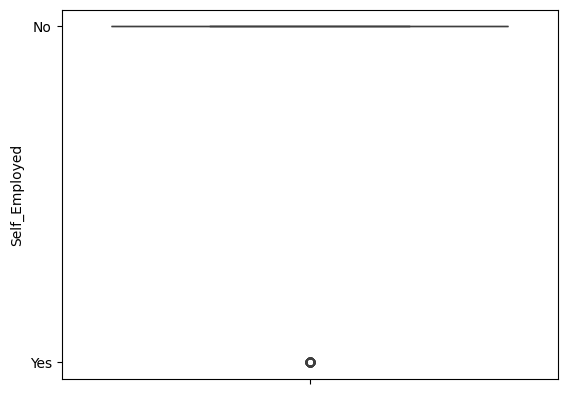

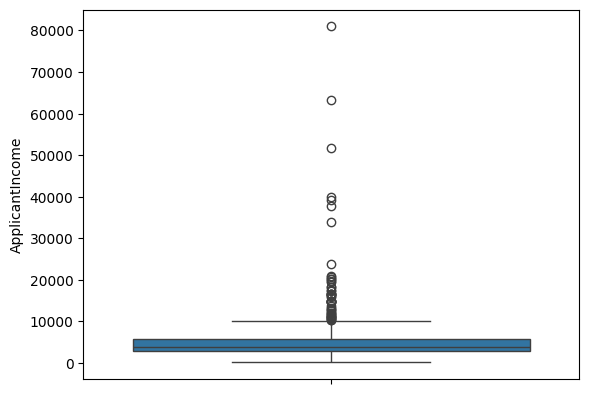

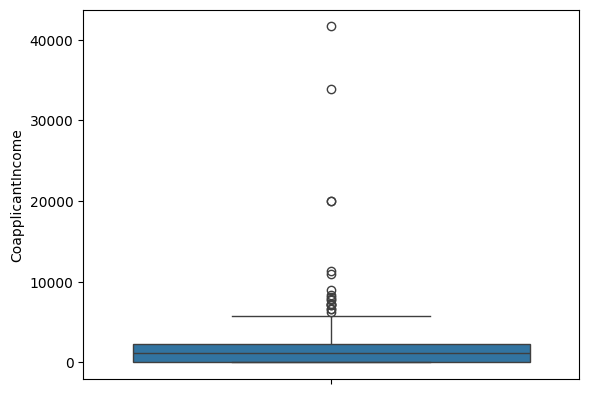

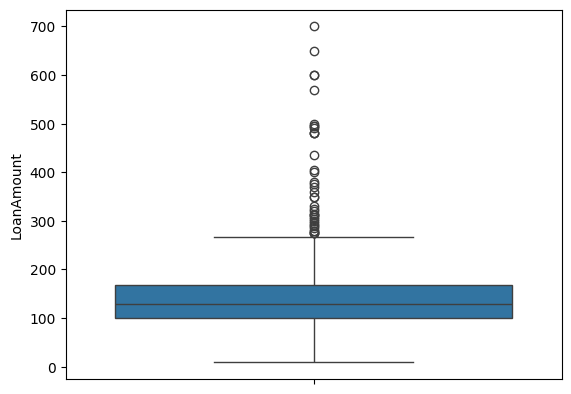

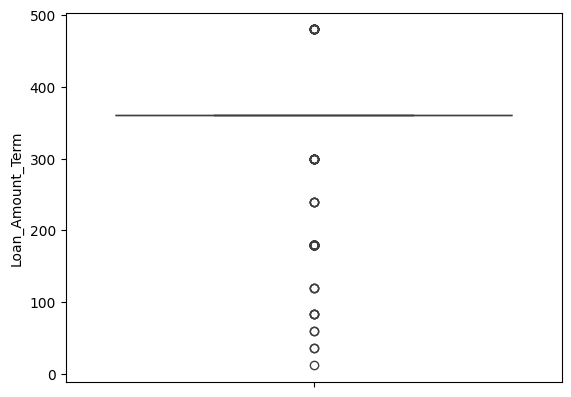

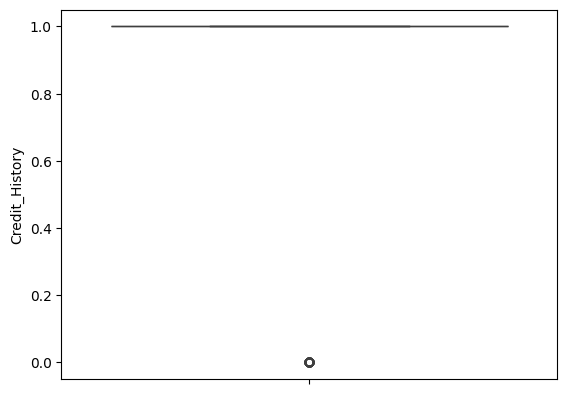

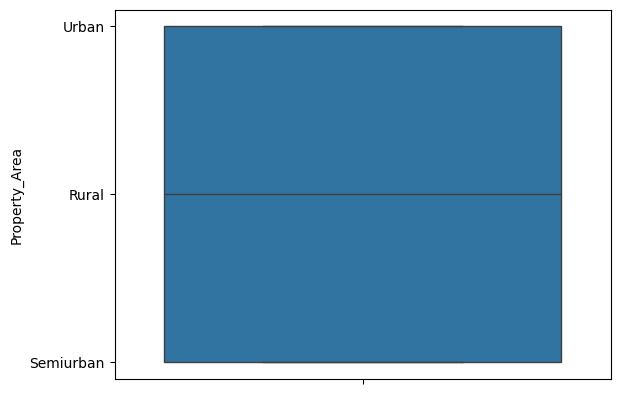

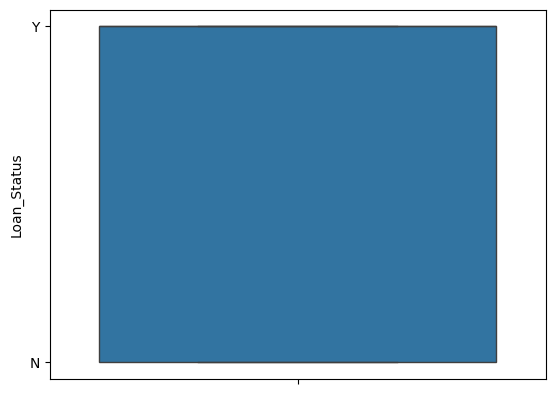

In [ ]:
for col in df.columns:
   sns.boxplot(df[col])
   plt.show()

2877.5
3812.5
5795.0
2917.5
-1498.75
10171.25


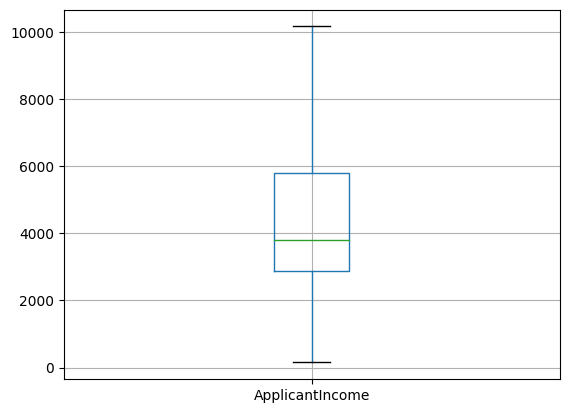

In [ ]:
Q1 = df["ApplicantIncome"].quantile(0.25)
Q2 = df["ApplicantIncome"].quantile(0.50)
Q3 = df["ApplicantIncome"].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
df["ApplicantIncome"]=df["ApplicantIncome"].clip(lower=lower_bound,upper=upper_bound)
df.boxplot("ApplicantIncome")
plt.show()

0.0
1188.5
2297.25
2297.25
-3445.875
5743.125


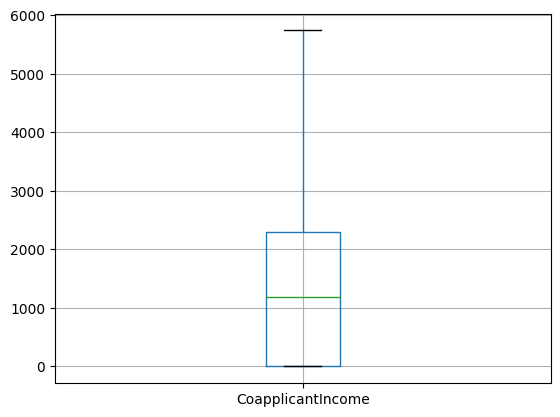

In [ ]:
Q1 = df["CoapplicantIncome"].quantile(0.25)
Q2 = df["CoapplicantIncome"].quantile(0.50)
Q3 = df["CoapplicantIncome"].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
df["CoapplicantIncome"]=df["CoapplicantIncome"].clip(lower=lower_bound,upper=upper_bound)
df.boxplot("CoapplicantIncome")
plt.show()

100.0
128.0
168.0
68.0
-2.0
270.0


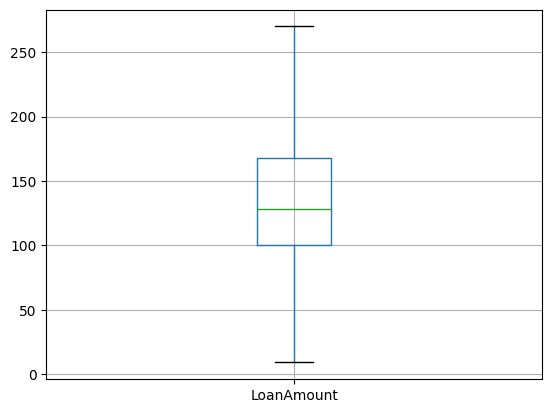

In [ ]:
Q1 = df["LoanAmount"].quantile(0.25)
Q2 = df["LoanAmount"].quantile(0.50)
Q3 = df["LoanAmount"].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
df["LoanAmount"]=df["LoanAmount"].clip(lower=lower_bound,upper=upper_bound)
df.boxplot("LoanAmount")
plt.show()

360.0
360.0
360.0
0.0
360.0
360.0


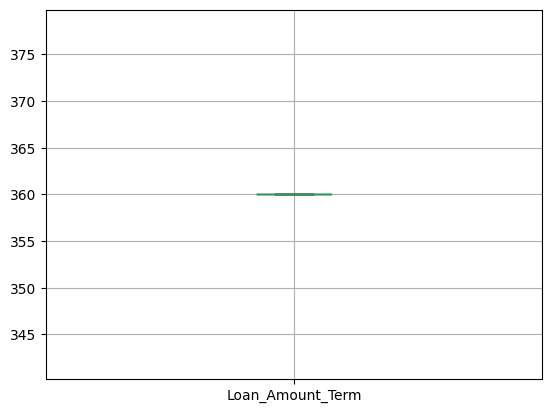

In [ ]:
Q1 = df["Loan_Amount_Term"].quantile(0.25)
Q2 = df["Loan_Amount_Term"].quantile(0.50)
Q3 = df["Loan_Amount_Term"].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].clip(lower=lower_bound,upper=upper_bound)
df.boxplot("Loan_Amount_Term")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed']
for col in cols:
  df[col]=le.fit_transform(df[col])


In [ ]:
print(df)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0         NaN             360.0   
1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in cols:
  df[col]=scaler.fit_transform(df[[col]])

In [ ]:
print(df)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.568692           0.000000         NaN               0.0   
1